 Used Car Price Predictor
 
 Import required libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

Data Analysiing and cleaning

In [3]:
# loading dataset
df = pd.read_csv('C:/Users/HP/Desktop/car final.csv')

In [4]:
# inspecting the first 5 rows of the dataframe
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
# checking the number of rows and columns
df.shape

(301, 9)

In [6]:
# getting some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   299 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


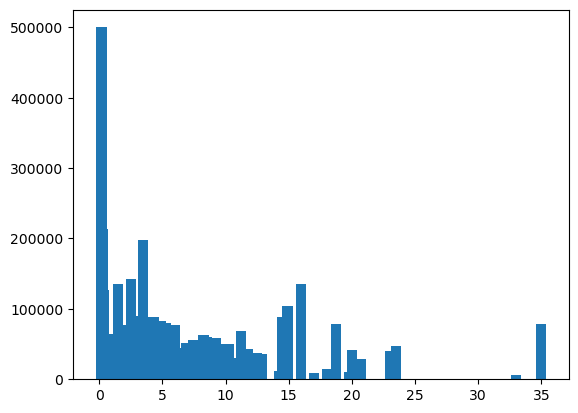

In [7]:
#bar graph between Selling price and Kms driven
plt.bar (x=df [ 'Selling_Price' ], height=df [ 'Kms_Driven' ])
plt.show ()

In [8]:
# checking the number of null values and taking sum
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     2
Owner            0
dtype: int64

In [9]:
#Analyzing Null Values

In [10]:
df["Transmission"].unique()

array(['Manual', 'Automatic', nan], dtype=object)

In [11]:
# filling null. values using backward fill method
df.Transmission.fillna(method="bfill",inplace=True)

In [12]:
df["Transmission"].unique()

array(['Manual', 'Automatic'], dtype=object)

In [13]:
# checking categorical data for fuel type
df.Fuel_Type.value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [14]:
# checking categorical data for seller type
df.Seller_Type.value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [15]:
# checking categorical data for transmission type
df.Transmission.value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

Encoding the Categorical Data

In [16]:
from sklearn import preprocessing

In [17]:
label_encoder = preprocessing.LabelEncoder()

In [21]:
df['Fuel_Type']= label_encoder.fit_transform(df['Fuel_Type'])
df['Seller_Type']= label_encoder.fit_transform(df['Seller_Type'])
df['Transmission']= label_encoder.fit_transform(df['Transmission'])

In [22]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


In [20]:
df.Fuel_Type.value_counts()

2    239
1     60
0      2
Name: Fuel_Type, dtype: int64

In [23]:
df.Seller_Type.value_counts()

0    195
1    106
Name: Seller_Type, dtype: int64

In [24]:
df.Transmission.value_counts()

1    261
0     40
Name: Transmission, dtype: int64

In [25]:
#dropping columns which are not required
X = df.drop(['Car_Name','Selling_Price'],axis=1)

In [26]:
#storing data to be predicted
Y = df['Selling_Price']

In [27]:
#data to be used for analysis
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          2            0             1   
1    2013           9.54       43000          1            0             1   
2    2017           9.85        6900          2            0             1   
3    2011           4.15        5200          2            0             1   
4    2014           6.87       42450          1            0             1   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             1   
297  2015           5.90       60000          2            0             1   
298  2009          11.00       87934          2            0             1   
299  2017          12.50        9000          1            0             1   
300  2016           5.90        5464          2            0             1   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [28]:
#target data
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


Splitting Training and Test data

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

Model Training

1. Linear Regression

In [30]:
# loading the linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [31]:
lr.fit(X_train,Y_train)

LinearRegression()

Evaluation

In [32]:
# Training data
training_data = lr.predict(X_train)

In [33]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data)
print("R squared Error : ", error_score)

R squared Error :  0.8810377299868241


Visualize the actual prices and Predicted prices

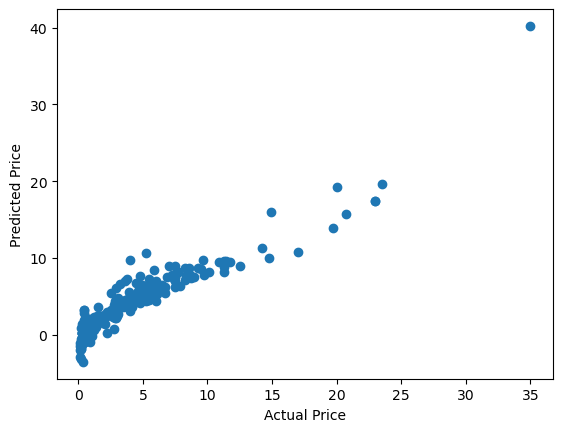

In [34]:
#scatter plot
plt.scatter(Y_train, training_data)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

In [35]:
# Testing data
test_data = lr.predict(X_test)

In [36]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data)
print("R squared Error : ", error_score)

R squared Error :  0.8557801067649884


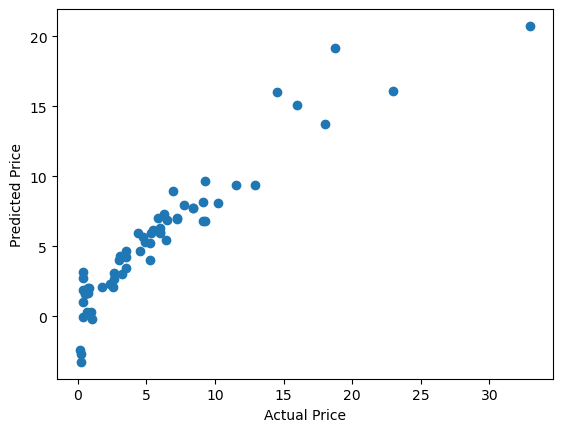

In [38]:
#scatter plot
plt.scatter(Y_test, test_data)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()